In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
info_cargo = pd.read_excel('Dataset 1.xlsx')
info_cargo.dtypes.value_counts()

object            51
int64             28
datetime64[ns]    21
float64            8
bool               1
Name: count, dtype: int64

In [3]:
info_cargo.head(5)

,Номер вагона,Номер накладной,Род вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Дата и время окончания рейса,Государство назначения,...,Номер уведомления ВУ-23,Номер уведомления ВУ-36,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
0,22793426,ЭХ920086,Крытые (20),РЖД (20),2024-02-18 09:37:00,Российская Федерация,Свердловская (76),Заячья Горка (769407),NaT,Российская Федерация (643),...,84.0,8.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
1,23592322,ЭХ712064,Крытые (20),РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),2024-02-19 14:59:00,Российская Федерация (643),...,740.0,66.0,False,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21
2,24298762,08401285,Крытые (20),РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),NaT,Российская Федерация (643),...,1142.0,123.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21
3,24345407,ЭЦ143114,Крытые (20),РЖД (20),2024-02-18 11:36:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,Российская Федерация (643),...,268.0,70.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
4,24345530,08404028,Крытые (20),РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),2024-02-19 11:30:00,Российская Федерация (643),...,260.0,290.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21


На данном этапе мы имеем немного, это датасет с 109 фичами, которые как-либо описывают грузовой вагон и моей целью будет предсказать фактическое время в пути вагона с точностью до дней. Давайте немного поиследуем данные

In [12]:
# Рассмотрим нашу целевую переменную
target = info_cargo['Срок доставки факт']
target.describe()

count    11433.000000
mean         8.851745
std          7.547631
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        170.000000
Name: Срок доставки факт, dtype: float64

Подозрительно большой максимум, давайте проверим на аномалии

<Axes: ylabel='Срок доставки факт'>

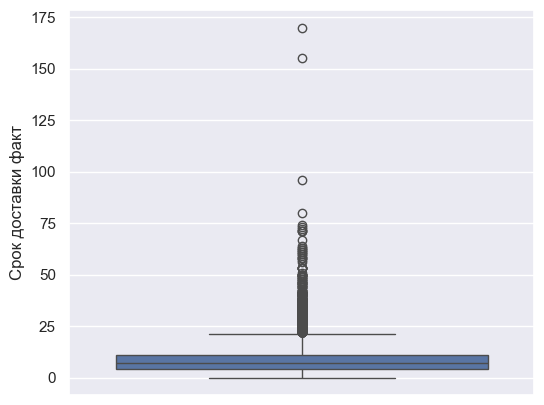

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,5))
sns.boxplot(target)

Есть прям выраженные аномалии, нужно рассмотреть их

In [27]:
info_cargo[info_cargo['Срок доставки факт'] > 75] 

,Номер вагона,Номер накладной,Род вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Дата и время окончания рейса,Государство назначения,...,Номер уведомления ВУ-23,Номер уведомления ВУ-36,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
3088,55708689,ЭЛ619325,Крытые (20),РЖД (20),2023-08-02 12:53:00,Российская Федерация,Забайкальская (94),Забайкальск (946801),2024-01-04 11:57:00,Российская Федерация (643),...,160.0,1327.0,True,"АО ""ПГК""",2024-01-04 11:57:00,155.0,9.0,2024-01-04,2023-08-02,2024-01-13
6459,29068160,34789607,Крытые (20),РЖД (20),2023-08-03 01:00:00,Российская Федерация,Октябрьская (1),Антропшино (32406),NaT,Российская Федерация (643),...,591.0,121.0,True,"АО ""ПГК""",2023-11-07 13:45:00,96.0,10.0,2023-11-07,2023-08-03,2023-11-17
6460,29069077,34408241,Крытые (20),РЖД (20),2023-05-21 01:00:00,Российская Федерация,Октябрьская (1),Антропшино (32406),NaT,Российская Федерация (643),...,3325.0,1.0,True,"АО ""ПГК""",2023-11-07 13:45:00,170.0,10.0,2023-11-07,2023-05-21,2023-11-17
8856,52043502,ЭЙ895804,Крытые (20),РЖД (20),2023-06-30 03:59:00,Российская Федерация,Дальневосточная (96),Хабаровск 2 (970001),2023-09-18 17:15:00,Российская Федерация (643),...,2144.0,0.0,True,"АО ""ПГК""",2023-09-18 17:15:00,80.0,19.0,2023-09-18,2023-06-30,2023-10-07


На первый взгляд всё нормально, думаю нам стоит избавится от некоторых признаков. В этом нам должен помочь PCA, но для этого нужно предобработать данные

## Работа с пропущенными значениями

In [37]:
# Для начало разберёмся с 
info_cargo.isnull().sum() # Очень много аномалий, которые обязательно нужно обработать

Номер вагона                    0
Номер накладной                 0
Род вагона                      0
Администрация собственника      0
Дата и время начала рейса       0
                             ... 
Срок доставки факт            660
Простой                       660
Дата завершения               660
Дата начала                     0
Дата актуальность               0
Length: 109, dtype: int64

In [41]:
print(info_cargo['Срок доставки факт'].isnull().sum())
print(info_cargo['Перевозка завершена'].value_counts())
print(info_cargo['Дата и время окончания рейса'].isnull().sum())
# Не сходятся числа пропущенных значений в целевой переменной и информации о завершённости перевозки, также есть ещё информация по окончанию рейса, что тоже не сходится надо проверить почему

660
Перевозка завершена
True     11056
False     1037
Name: count, dtype: int64
899


In [39]:
info_cargo[info_cargo['Перевозка завершена'] == False] # Здесь явно замешена колонка простой

,Номер вагона,Номер накладной,Род вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Дата и время окончания рейса,Государство назначения,...,Номер уведомления ВУ-23,Номер уведомления ВУ-36,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
0,22793426,ЭХ920086,Крытые (20),РЖД (20),2024-02-18 09:37:00,Российская Федерация,Свердловская (76),Заячья Горка (769407),NaT,Российская Федерация (643),...,84.0,8.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
1,23592322,ЭХ712064,Крытые (20),РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),2024-02-19 14:59:00,Российская Федерация (643),...,740.0,66.0,False,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21
2,24298762,08401285,Крытые (20),РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),NaT,Российская Федерация (643),...,1142.0,123.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21
3,24345407,ЭЦ143114,Крытые (20),РЖД (20),2024-02-18 11:36:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,Российская Федерация (643),...,268.0,70.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
4,24345530,08404028,Крытые (20),РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),2024-02-19 11:30:00,Российская Федерация (643),...,260.0,290.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,55708572,ЭФ261346,Крытые (20),РЖД (20),2024-01-15 18:02:00,Российская Федерация,Северо-Кавказская (51),Махачкала (543301),2024-01-22 10:21:00,Российская Федерация (643),...,2232.0,370.0,False,"АО ""ПГК""",2024-01-22 10:21:00,7.0,30.0,2024-01-22,2024-01-15,2024-02-21
1033,55723357,ЭЦ098793,Крытые (20),РЖД (20),2024-02-17 11:16:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,Российская Федерация (643),...,473.0,1047.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-17,2024-02-21
1034,55723548,ЭХ892239,Крытые (20),РЖД (20),2024-02-13 17:04:00,Российская Федерация,Северо-Кавказская (51),Шедок (535907),NaT,Российская Федерация (643),...,2174.0,304.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-13,2024-02-21
1035,57403214,35691024,Крытые (20),РЖД (20),2024-02-07 12:06:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,МОНГОЛИЯ (496),...,1504.0,242.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-07,2024-02-21


In [46]:
time = info_cargo[['Дата и время окончания рейса','Срок доставки факт', 'Перевозка завершена', 'Простой']][info_cargo['Перевозка завершена'] == False]
print(time.isnull().sum())
time

Дата и время окончания рейса    564
Срок доставки факт              538
Перевозка завершена               0
Простой                         538
dtype: int64


,Дата и время окончания рейса,Срок доставки факт,Перевозка завершена,Простой
0,NaT,NaN,False,NaN
1,2024-02-19 14:59:00,7.0,False,2.0
2,NaT,5.0,False,1.0
3,NaT,NaN,False,NaN
4,2024-02-19 11:30:00,8.0,False,2.0
...,...,...,...,...
1032,2024-01-22 10:21:00,7.0,False,30.0
1033,NaT,NaN,False,NaN
1034,NaT,NaN,False,NaN
1035,NaT,NaN,False,NaN


Больше False объясняется, тем что наши вагоны могут приехать, но ещё стоять на станции ждать разгрузки.
Даты и время окончания рейса очень странно работает и просто по своей сути дублирует информацию, их лучше вообще не учитывать, скорей всего данных нет из-за того что точного времени может быть неизвестно, поэтому и оставляем пустым, вообще те случаи когда у нас целевая переменная имеет неизвестные значение и такие лучше сразу убрать, так как они не имеют смысла для наших моделей.

In [60]:
info_cargo = info_cargo.dropna(subset=['Срок доставки факт'])
info_cargo_imp = info_cargo.drop(columns = ['Дата и время окончания рейса','Идентификатор отправки по досылке', 'Дата исключения','Признак аренды', 'Номер накладной', 'Грузоотправитель (ТГНЛ)', 'Грузоотправитель', 'Грузоотправитель (ОКПО)', 'Грузополучатель (ТГНЛ)','Грузополучатель', 'Грузополучатель (ОКПО)', 'Код груза ГНГ', 'Арендатор', 'Арендатор (ОКПО)', 'Арендатор (локальный код)','Станция приписки аренды','Дата окончания аренды','Оператор по доверенности', 'Оператор по доверенности (ОКПО)', 'Собственник (ОКПО)'])
## Немного разгрузил данные, удалив колонки дублирующую информацию, почти все значения пропуски и просто бесполезную информацию для предсказания

In [62]:
info_cargo_imp

,Номер вагона,Род вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Государство назначения,Дорога назначения,Станция назначения,...,Номер уведомления ВУ-23,Номер уведомления ВУ-36,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
1,23592322,Крытые (20),РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),Российская Федерация (643),Южно-Уральская (80),Металлургическая (801208),...,740.0,66.0,False,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21
2,24298762,Крытые (20),РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),...,1142.0,123.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21
4,24345530,Крытые (20),РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),...,260.0,290.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21
6,28031169,Крытые (20),РЖД (20),2024-01-18 15:51:00,Российская Федерация,Южно-Уральская (80),Металлургическая (801208),Российская Федерация (643),Дальневосточная (96),Южно-Сахалинск-Грузовой (991101),...,73.0,17.0,False,"АО ""ПГК""",2024-02-18 00:05:00,31.0,3.0,2024-02-18,2024-01-18,2024-02-21
8,28031474,Крытые (20),РЖД (20),2024-01-28 08:33:00,Турецкая Республика,Северо-Кавказская (51),Темрюк (Эксп.) (527807),Российская Федерация (643),Северо-Кавказская (51),Шедок (535907),...,1120.0,186.0,False,"АО ""ПГК""",2024-02-03 22:28:00,6.0,18.0,2024-02-03,2024-01-28,2024-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12088,52688181,Крытые (20),РЖД (20),2023-07-22 00:54:00,Российская Федерация,Горьковская (24),Ижевск (255409),Российская Федерация (643),Горьковская (24),Игумново (264803),...,648.0,1.0,True,"ООО ""АТЛАНТ""",2023-08-23 09:12:00,32.0,6.0,2023-08-23,2023-07-22,2023-08-29
12089,52680584,Крытые (20),РЖД (20),2023-08-21 04:19:00,Российская Федерация,Горьковская (24),Муром1 (240000),Российская Федерация (643),Горьковская (24),Игумново (264803),...,572.0,24.0,True,"ООО ""АТЛАНТ""",2023-08-23 17:02:00,2.0,8.0,2023-08-23,2023-08-21,2023-08-31
12090,28075877,Крытые (20),РЖД (20),2023-08-13 18:02:00,Российская Федерация,Горьковская (24),Игумново (264803),Российская Федерация (643),Северо-Кавказская (51),Махачкала (543301),...,435.0,18.0,True,"ООО ТК ""ТРАНКОМ-СЕРВИС""",2023-08-28 11:16:00,15.0,2.0,2023-08-28,2023-08-13,2023-08-30
12091,52669017,Крытые (20),РЖД (20),2023-07-26 16:49:00,Российская Федерация,Северо-Кавказская (51),Шедок (535907),Российская Федерация (643),Московская (17),Павшино (196502),...,0.0,10.0,True,"ООО ""АТЛАНТ""",2023-08-18 17:21:00,23.0,3.0,2023-08-18,2023-07-26,2023-08-21
